<img 
     align = "left"
     width = "200"
     src = https://boomebike.com/cdn/shop/files/boomebike_logo-removebg-preview.png >

# <font align = "left" color='blue'> Boom Bikes - Demand Prediction - Linear Regression - Assignment </font>
<br>
<span style="color:rgb(255,0,100); font-weight:Bold">
&nbsp;Performed by : &nbsp;LakshmiKanth
</span>
<span style="color:black">
______________________________________________________________________________________________________________________________
</span>

### <font align = "left" color='blue'> About the Company: </font>
BoomBikes is a company that **provides bike-sharing service to the customers**. A bike-sharing system is a service in which **bikes are made available for shared use** to individuals **on a short term basis for a price or free**. Many bike share systems allow people to **borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system**. 
### <font align = "left" color='blue'> Business Situation: </font>
BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### <font align = "left" color='blue'> Business Requirements (Objective of this Assignment): </font>
BoomBikes aspires to understand the **demand for shared bikes among the people** after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this **to prepare themselves to cater to the people's needs** once the situation gets better all around and **stand out from other service providers and make huge profits**.
    
For this purpose, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**

### <font align = "left" color='blue'> <u>GOAL</u> :</font>
**Build a Multiple Linear Regression Model for the Prediction of Demand for Shared Bikes** <br>
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**The model should be built taking the 'cnt' column in the dataset as the** <u>**Target Variable**</u>.


<span style="color:black">
______________________________________________________________________________________________________________________________
</span>

### <font align = "left" color='blue'> Approach followed for Model Building and Prediction: </font>
**Below are the steps that would be followed :**<br><br>
**1. Importing necessary libraries & Loading Data for Analysis**<br>
**2. Data Understanding**<br>
&nbsp;&nbsp;    2.1 &nbsp;&nbsp;Exploring the Data Dictionary<br>
&nbsp;&nbsp;    2.2 &nbsp;&nbsp;Exploring Data Structure, Data Shape and Size<br>
&nbsp;&nbsp;    2.3 &nbsp;&nbsp;Null Values & Unique Values Analysis<br>
**3. Data Wrangling**<br> 
&nbsp;&nbsp;    3.1 &nbsp;&nbsp;Remove Unwanted Columns and Rows<br>
&nbsp;&nbsp;    3.2 &nbsp;&nbsp;Missing Values and Duplicate Values Treatment<br>
&nbsp;&nbsp;    3.3 &nbsp;&nbsp;Data Segmentation<br>
&nbsp;&nbsp;    3.4 &nbsp;&nbsp;Outliers Treatment<br>
**4. Exploratory Data Analysis**<br>
&nbsp;&nbsp;    4.1 &nbsp;&nbsp;Univariate Analysis<br>
&nbsp;&nbsp;    4.2 &nbsp;&nbsp;Bivariate Analysis<br>
&nbsp;&nbsp;    4.3 &nbsp;&nbsp;Multivariate Analysis<br>
**5. Data Preparation - Creating Dummy Variables**<br>
**6. Train-Test Split - Creating the Training Dataset and Testing Dataset**<br>
**7. Scaling - Scaling the Training Dataset using the Normalization method (Min-Max Scaling)**<br>
**8. Model Building - Develop the Initial Model with all parameters**<br>
**9. Feature Selection - Using a combination of Recursive Feature Elimination (RFE - Automated Method) and Manual Selection**<br>
**10. Model Re-Building - Re-Build the model using the selected features**<br>
**11. Residual Analysis of the Training Dataset**<br>
**12. Predictions - Using the Final model to make predictions on the Testing Dataset**<br>
**13. Model Evaluation**<br>
**14. Summarising Observations and Final Conclusion**<br>


### <font align = "left" color='blue'> 1. Importing necessary libraries & Loading Data for Analysis </font>

### 1.1 Importing Libraries

In [1]:
# importing Libraries for data manipulation
import pandas as pd
import numpy as np

# importing Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.display import HTML

# importing warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting Up Display Options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

# importing Libraries for Model Building and Evaluation
# importing statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 1.2 Loading the Dataset and the Data Dictionary

In [2]:
# Loading the Boom Bikes Data
bikes_df = pd.read_csv("day.csv")

### <font align = "left" color='blue'> 2. Data Understanding </font>

### 2.1 Exploring the Data Dictionary

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### 2.2 Exploring Data Structure, Data Shape and Size

In [3]:
# Printing the first 5 rows of the data to analyse the structure
bikes_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Exploring the Column Headers
bikes_df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [5]:
# Exploring the Data Shape & Size
bikes_df.shape

(730, 16)

In [6]:
# Exploring the Basic infomation about the data
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Exploring the Data types in each column
bikes_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# Exploring the Details of the data
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class = "alert alert-block alert-success">
    <b>Observations - </b>
    <ol>
        <li> Data has 16 columns and 730 rows </li>
        <li> 4 columns are of Float type, 11 are int type and 1 is object oriented, potentially String type </li>
        <li> `dteday` column should be in datetime format but it is in object datatype. </li>
        <li> Some columns logically make sense to be treated as categorical variables but are in int/float datatype, e.g. `season`, `yr`, `mnth`, etc. </li>
        <li> None of the columns have Blanks or Null Values. We will double check and confirm in the next step </li>
    </ol>
</div>

### 2.3 Exploring Null Values and Unique Values

In [9]:
# Checking the % of null values in all columns
null_perc = (bikes_df.isnull().sum()/bikes_df.shape[0]*100).round(2).sort_values(ascending = False)
null_perc

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<div class = "alert alert-block alert-info">
    <b>Inference - </b> Confirmed that there are no Blank or Null Values in any of the columns.
    
</div>

In [10]:
# Checking the unique values in all columns
bikes_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<div class = "alert alert-block alert-info">
    <b>Inference - </b> After exploring the above and the data dictionary, we see that    
</div>

The **Categorical Columns** are:

> `season`, `year`, `month`, `holiday`, `weekday`, `working_day`, and `weather_situations`.

However, the **Numerical Columns** are:

> `temperature`, `apparent_temperature`, `humidity`, `wind_speed`, and `count`.


<div class = "alert alert-block alert-success">
    <b>Observations / Next Steps - </b> After all the Inferences above from Data Understanding, we understand:
    <ol>
        <li> `instant`: Instant is merely an index for the dataset. This column can be dropped</li>
        <li> `dteday`: Since we already have the columns `yr`, `mnth` and `weekday` we no longer need this column. </li>
        <li> `mnth`,`weekday` - We can have some relation between cnt and mnth, weekday, but splitting them into dummy variables will add too many columns and make our model far too complex, for very little slope coeffiecients. </li>
        <li> Both `casual` and `registered` are directly additive to `cnt`. Including them in the model would add redundant information and could lead to <b>multicollinearity</b>, where independent variables are highly correlated with each other, making it harder to assess the effect of each variable. This needs to be verified later and removed </li>
        <li> When building a predictive model for bike rentals, the `cnt` variable provides the comprehensive target we aim to predict. </li>
    </ol>
</div>

### <font align = "left" color='blue'> 3. Data Wrangling </font>

### 3.1 Remove Unwanted Columns and Rows

In [11]:
# Removing unwanted columns
bikes_df = bikes_df.drop(columns=['instant','dteday'])

bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3.2 Missing Values / Duplicate Values Treatment

In [12]:
# Checking for any duplicate rows that need to be deleted
bikes_df.duplicated().sum()

0

<div class = "alert alert-block alert-info">
    <b>Inference - </b> There are no duplicate rows in the data and earlier we saw that there are no missing or null values
    
</div>

### 3.3 Data Segmentation

In [13]:
# After exploring the data dictionary, we see that few column values need to be replaced

bikes_df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

bikes_df.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                            7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)

bikes_df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

bikes_df.weathersit.replace({1:"Clear",2:"MistCloudy",3:"LightSnowRain",4:"HeavyRain"}, inplace=True)


bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Categorizing all the columns
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### 3.4 Outliers Treatment

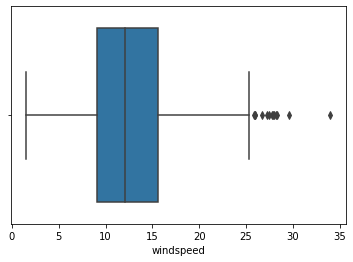

In [15]:
sns.boxplot(bikes_df['windspeed'])
plt.show()

In [16]:
quantile_info = bikes_df.windspeed.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info


#The values after 98 percentile seems to be disconected from the general distribution and also 
#there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.98


0.50    12.125325
0.75    15.625589
0.90    19.833997
0.95    22.999988
0.97    23.999167
0.98    25.201627
0.99    27.380948
Name: windspeed, dtype: float64

In [17]:
per_98_windspeed = bikes_df['windspeed'].quantile(0.98)
bikes_df = bikes_df[bikes_df.windspeed <= per_98_windspeed]

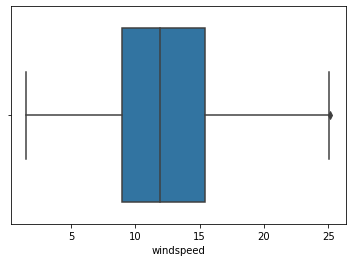

In [18]:
sns.boxplot(bikes_df['windspeed'])
plt.show()

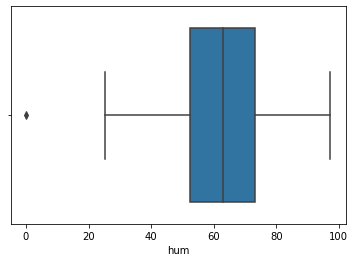

In [19]:
sns.boxplot(bikes_df['hum'])
plt.show()

In [20]:
quantile_info = bikes_df.hum.quantile([0.01,0.02,0.03,0.04,0.05,0.1,0.20,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

#The values before 1 percentile seems to be disconected from the general distribution and also 
#there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.01

0.01    31.419234
0.02    36.011676
0.03    39.199200
0.04    40.200004
0.05    41.087500
0.10    45.683340
0.20    50.388040
0.50    63.083300
0.75    73.270850
0.90    81.900020
0.95    87.050010
0.97    89.605800
0.98    90.918324
0.99    92.858362
Name: hum, dtype: float64

In [21]:
per_01_hum = bikes_df['hum'].quantile(0.01)
bikes_df = bikes_df[bikes_df.hum >= per_01_hum]

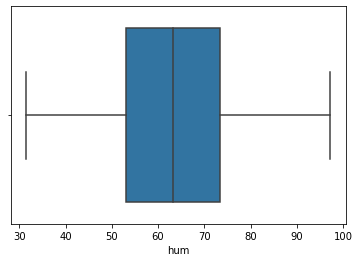

In [22]:
sns.boxplot(bikes_df['hum'])
plt.show()

### <font align = "left" color='blue'> 4. Exploratory Data Analysis - Data Visualisation </font>

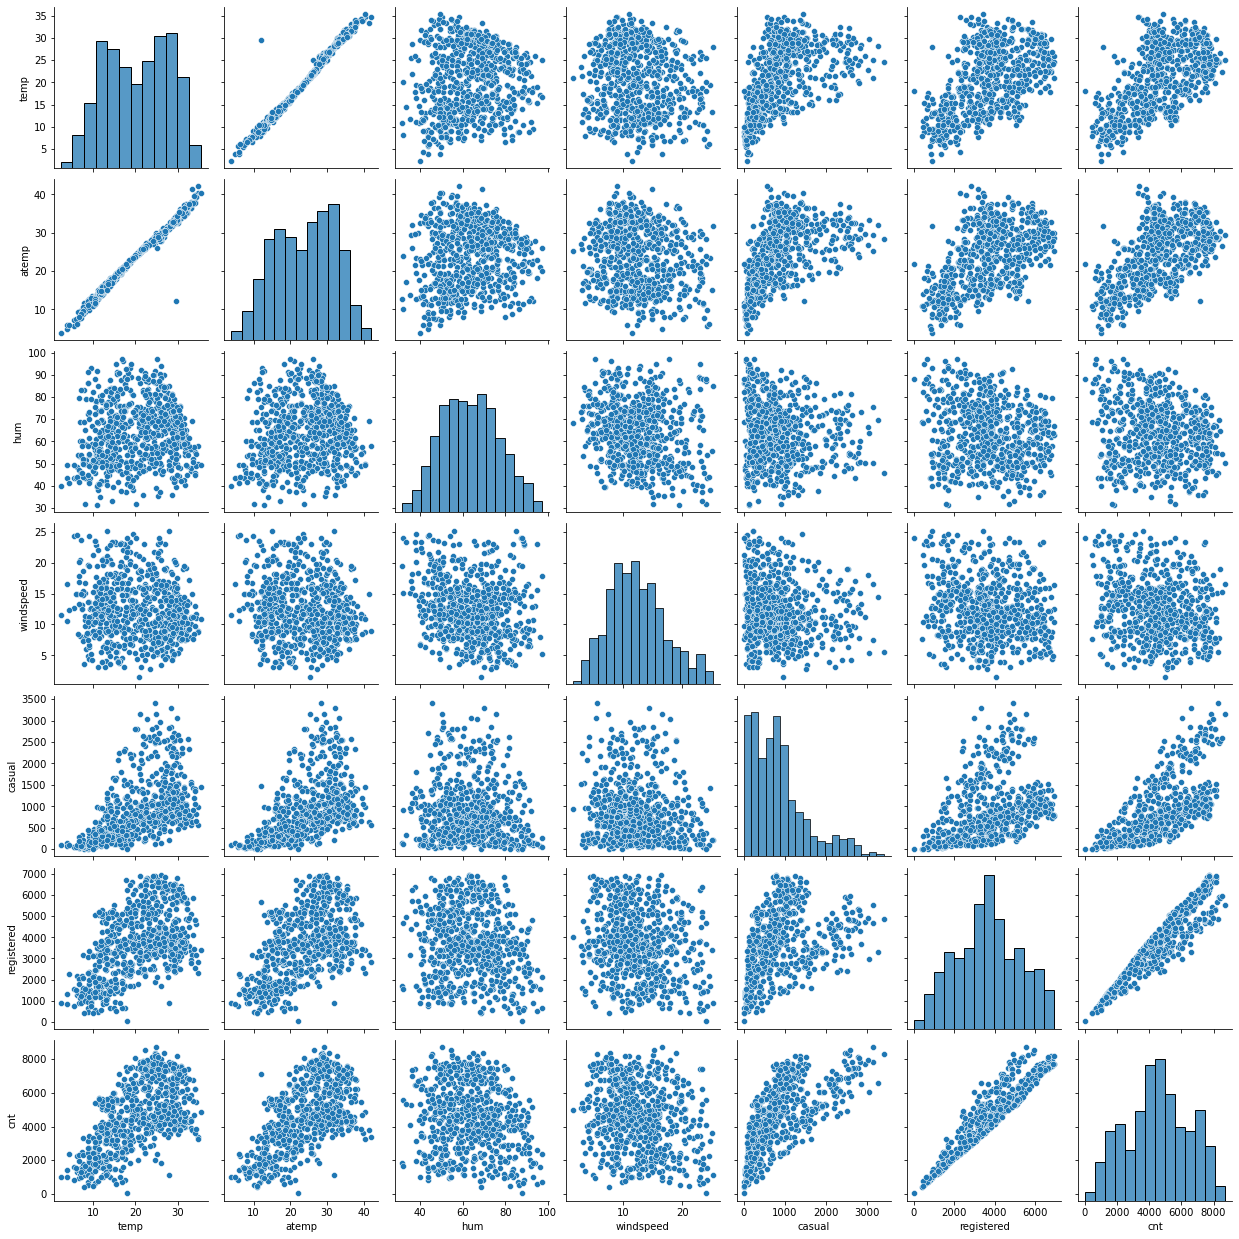

In [23]:
# Exploring the Numerical Variables
sns.pairplot(bikes_df, vars = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])

plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> <br>
    - We can see that cnt has high correlation with registered, casual, temp. <br>
    - `temperature`, `apparent_temperature` and `count` have Multiple Peaks and relatively Low Skewness.<br>
    - `humidity` has **Low Skewness** and `wind_speed` has a Moderate Positive Skewness.<br>
    -  Highest Frequency of `count` is observed around 4000.<br>
    
</div>

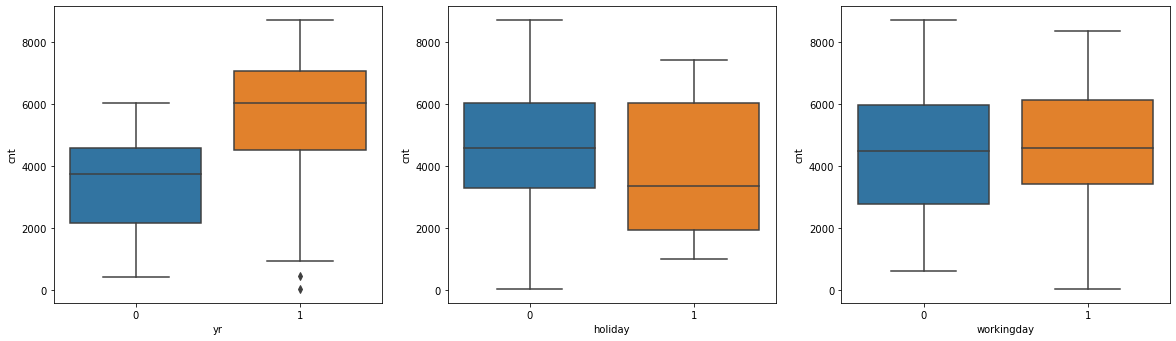

In [24]:
# Exploring relation between cnt and yr, holiday, workingday

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df)

plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> 
    <ol>
        <li> yr is positively related to cnt.  </li>
        <li> We have more cnt on holiday. </li>
        <li> We have more cnt on non-working day. </li>
    </ol>
</div>

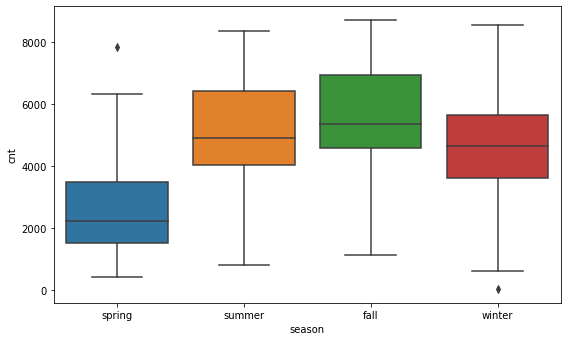

In [25]:
# Exploring relation between cnt and season

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df)
plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> Summer and Fall have larger use of bikes
    
</div>

In [26]:
# Creating a function to calculate the percentage values for each bar in graphs and to show the plot

def get_percs(plot, col):
    count = len(col)
    for p in ax.patches:
        percs = "{:.0f}%".format(100 * p.get_height() / count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percs, (x,y), ha = "center", va = "bottom", fontsize = 12)


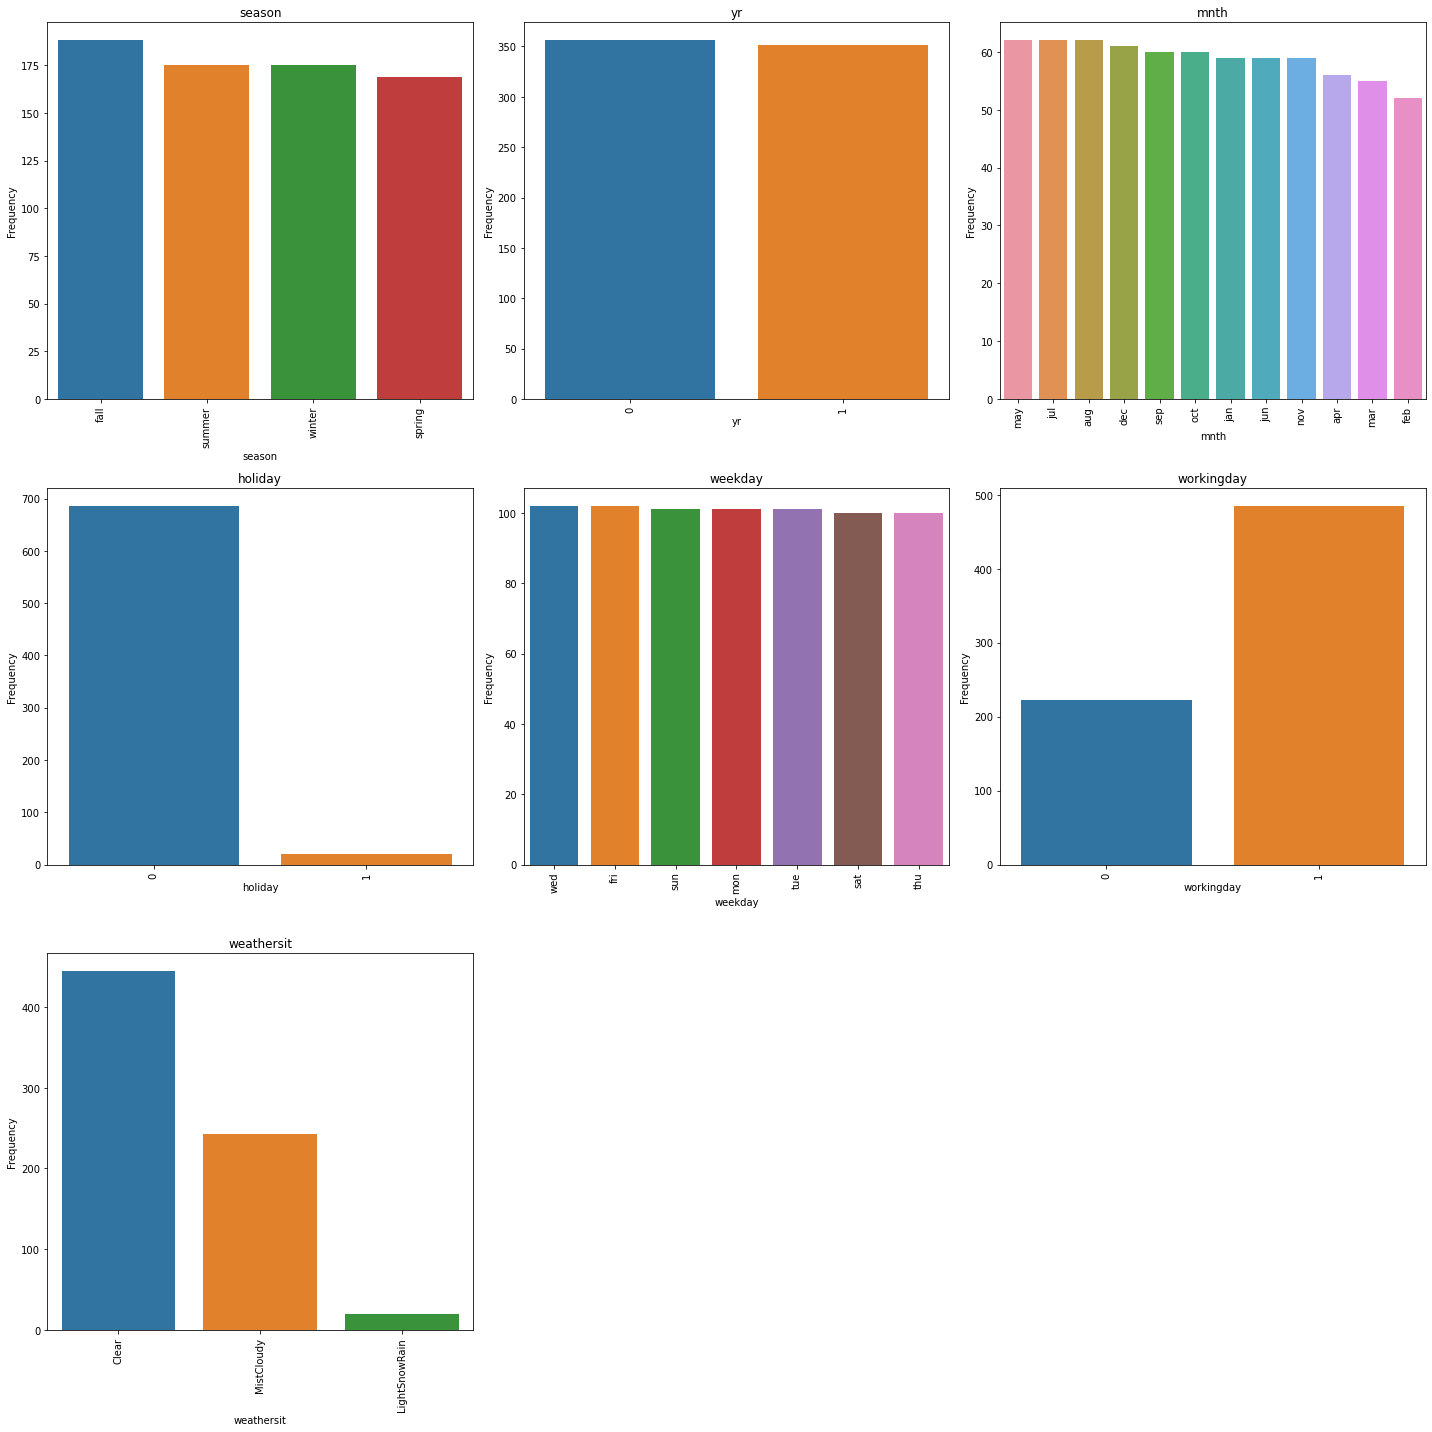

In [27]:
# Create a figure and axes
plt.figure(figsize=(20, 20))

# Loop through categorical columns and plot bar plots
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    
    # Calculate counts of each category
    count_data = bikes_df[column].value_counts()
    
    # Create a bar plot
    sns.barplot(x=count_data.index, y=count_data.values)
    
    # Set title and labels
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> 
    <ol>
        <li> Frequency is higher on the days when weather situations are GOOD  </li>
        <li> Frequency is higher on the working days and lower on the holidays. </li>
        <li> Frequency is higher in fall and lowest in spring. </li>
        <li> Frequency is typically lower in the months of Feb, Mar, and Apr. </li>
    </ol>
    
</div>

### 4.2 Bi-Variate Analysis

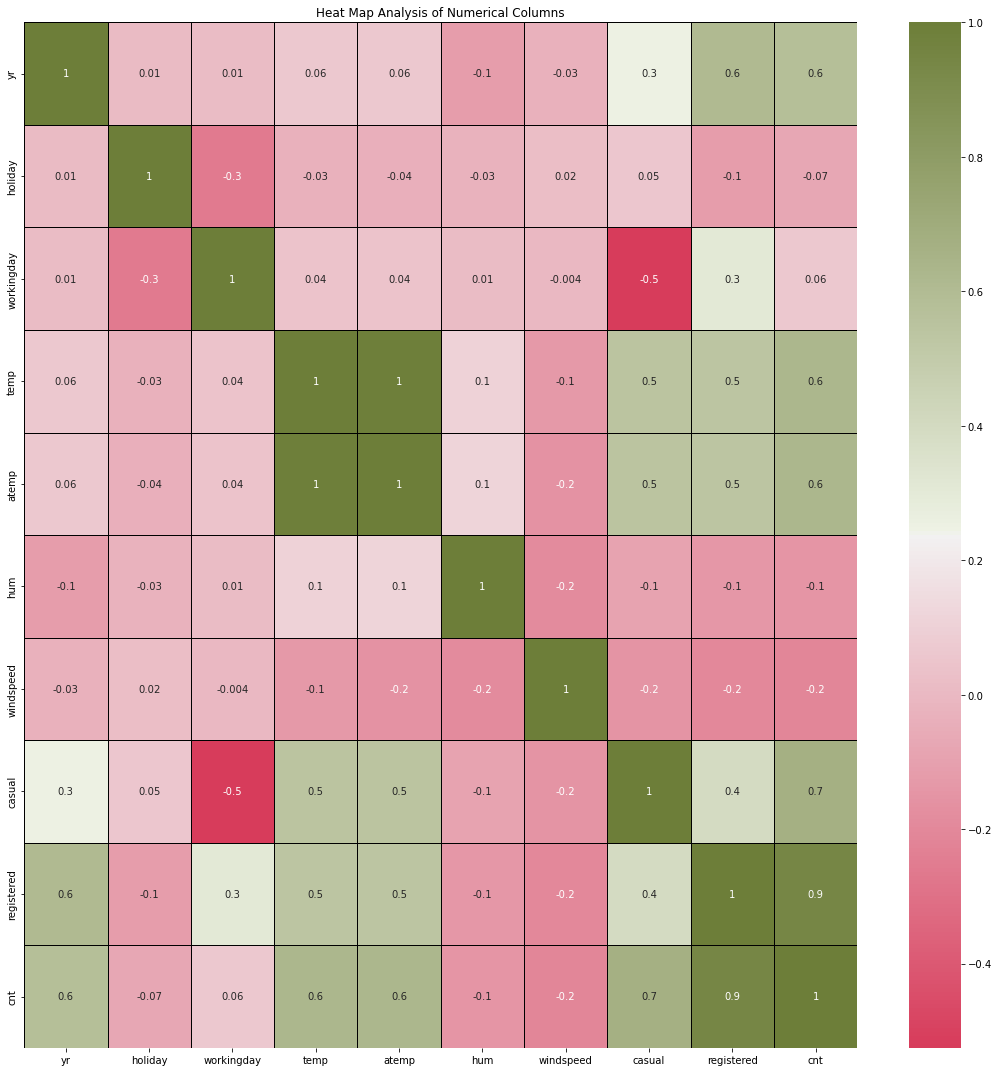

In [28]:
# Analysing the correlation between categorical columns
corr_data = bikes_df.corr()

plt.figure(figsize=(15,15))
ax = sns.heatmap(corr_data, 
                 annot = True, 
                 fmt='.1g', 
                 linewidths= 0.5, 
                 linecolor= "black",
                cmap=sns.diverging_palette(5, 100, as_cmap=True))
ax.set_title("Heat Map Analysis of Numerical Columns")
plt.tight_layout()
plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> 
    <ol>
        <li> `count` shows significant positive correlations with `temperature` and `apparent_temperature`, moderate correlation with `year` and moderate inverse correlation with `wind_speed`.</li>
        <li> Given that `temperature` and `apparent_temperature` are highly correlated with each other (approximately 1), we should consider dropping `apparent_temperature` before performing linear regression. This is because including both features in the model can lead to multicollinearity, which inflates the variance of the coefficient estimates and makes the model's predictions unstable and less interpretable. By dropping one of these highly correlated features, we can reduce multicollinearity, leading to more reliable and interpretable regression coefficients.</li>
        <li>  `working_day` and `holiday` have a moderate negative correlation. </li>
        <li> `humidity` has moderate correlation with `wind_speed`, `year`, `temperature`, `apparent_teperature` and `count`. Hence it must be check for multicollinearity.</li>
    </ol>
</div>

### Target vs Numerical Features

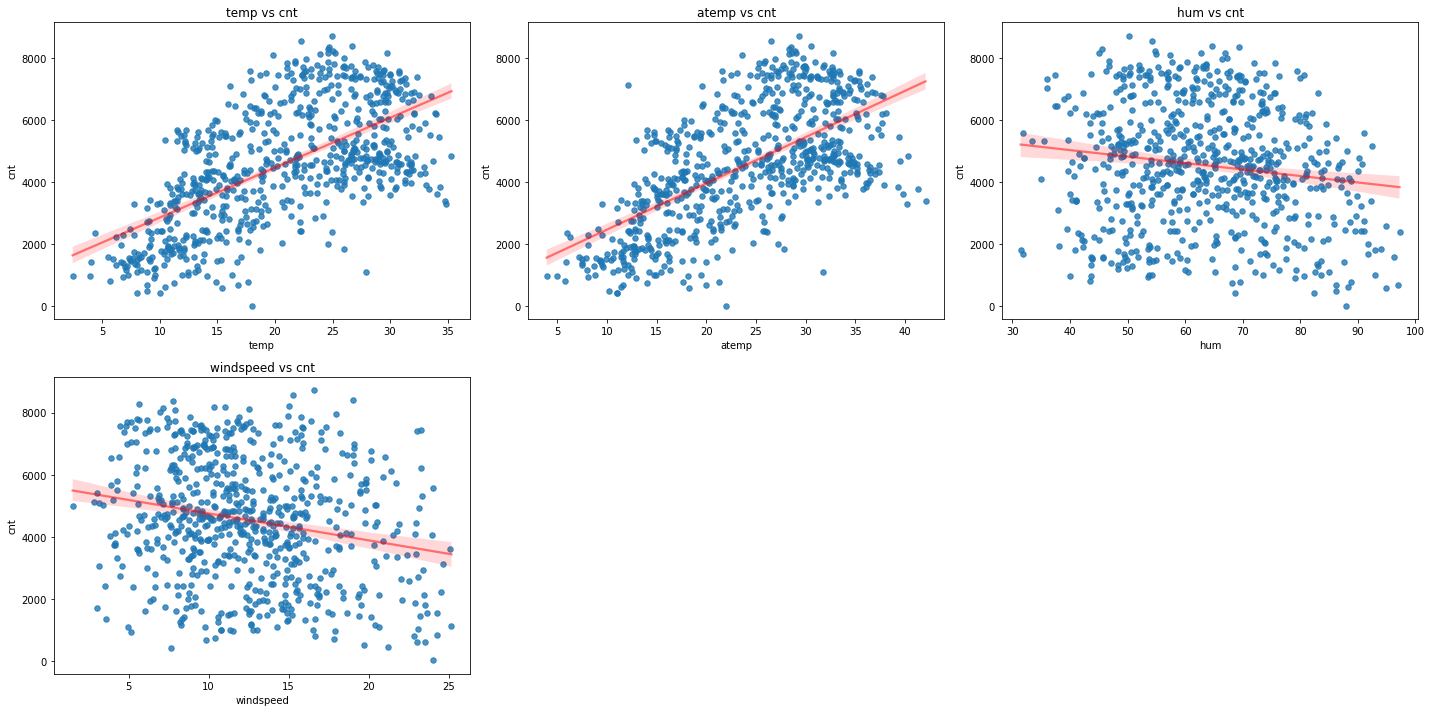

In [29]:
# Create a figure and axes
plt.figure(figsize=(20, 10))

# Create a regplot for each numerical column
y_col = 'cnt'
for i, x_col in enumerate(num_cols):
    if x_col is not 'cnt':
        plt.subplot(2, 3, i + 1)
        sns.regplot(x=x_col, y=y_col, data=bikes_df, scatter_kws={'s':30}, line_kws={'color':'red', 'alpha':0.5})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'{x_col} vs {y_col}')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

### Target vs Categorical Features

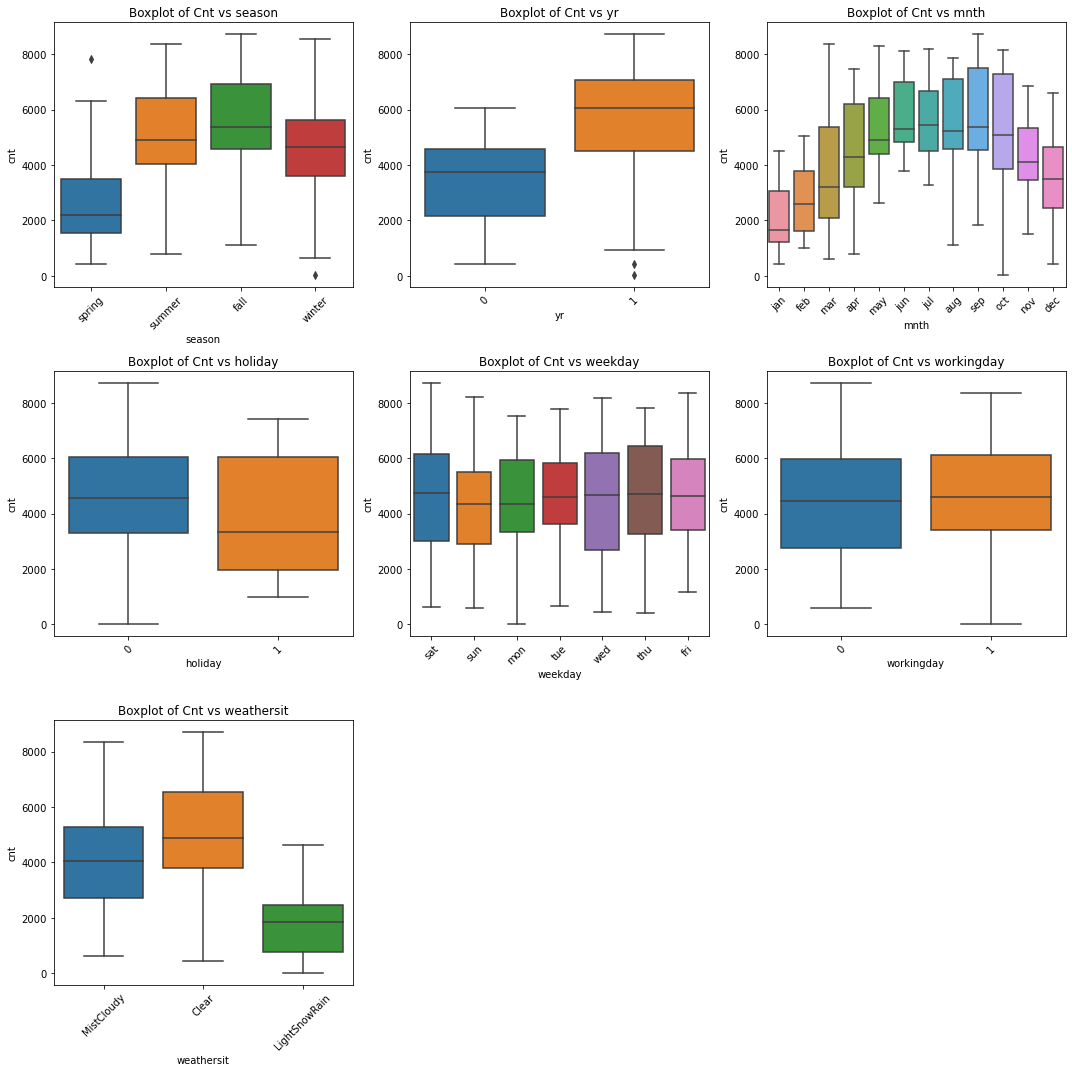

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create a boxplot for each categorical column
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=column, y='cnt', data=bikes_df)
    plt.title(f'Boxplot of Cnt vs {column}')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> 
    <ol>
        <li> Demand for bike rentals is highest in the Fall Season</li>
        <li> There is Year-on-Year Increase in demand between 0 (2018) and 1 (2019)</li>
        <li> Demand is highest in the Dry months of June-October </li>
        <li> Though demand is low on Holidays, the boxplot shows high variability in distribution. </li>
        <li> Clear Weather Situations contribute to Higher demands. </li>
        <li> Demand is higher on working days and hence shows lower variability as compared to non-working days.</li>
        <li> Wednesday, Thursday and Saturday have higher demands w.r.t. the rest of the days of the week.</li>
    </ol>
</div>

### <font align = "left" color='blue'> 5. Data Preparation </font>

### Creating Dummy Variables

In [31]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
# Creating Dummy Variables for Season and weathersit columns

season_dum_vars = pd.get_dummies(bikes_df['season'], drop_first = True)

weathersit_dum_vars = pd.get_dummies(bikes_df['weathersit'], drop_first = True)

# Adding the dummy variables to the dataframe and removing the original columns
bikes_df = pd.concat([bikes_df, weathersit_dum_vars, season_dum_vars], axis = 1)

bikes_df = bikes_df.drop(['season','weathersit'], axis = 1)

bikes_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,LightSnowRain,MistCloudy,spring,summer,winter
0,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


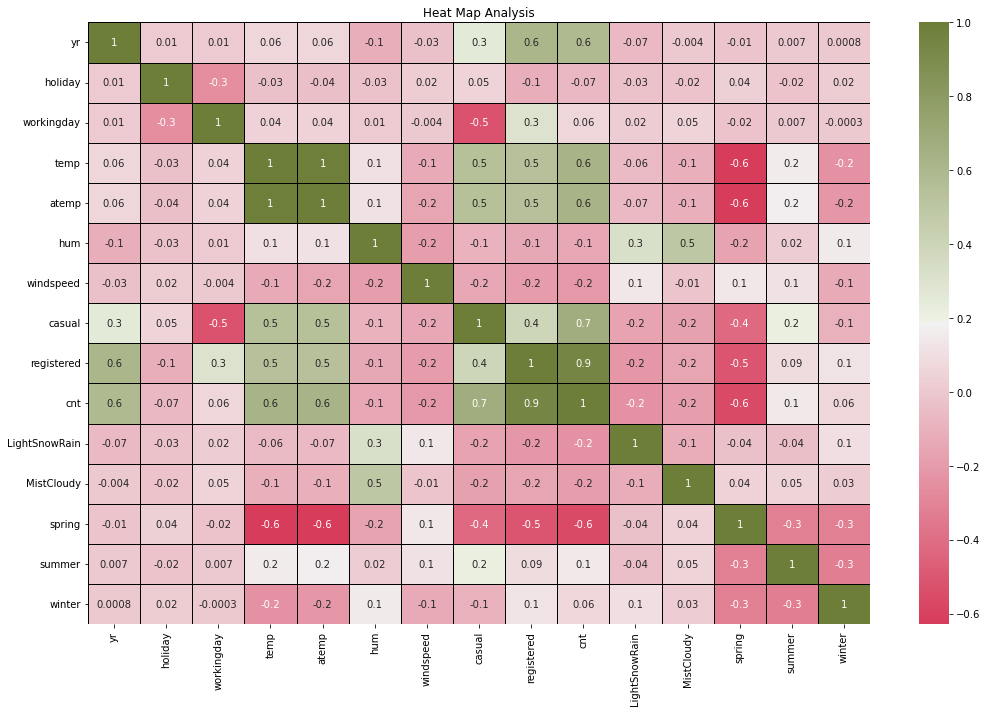

In [33]:
# Exploring the MultiCollinearity by checking the correlation coefficients to see which variables are highly correlated

corr_data = bikes_df.corr()

plt.figure(figsize=(15,10))
ax = sns.heatmap(corr_data, 
                 annot = True, 
                 fmt='.1g', 
                 linewidths= 0.5, 
                 linecolor= "black",
                cmap=sns.diverging_palette(5, 100, as_cmap=True))
ax.set_title("Heat Map Analysis")
plt.tight_layout()
plt.show()

<div class = "alert alert-block alert-info">
    <b>Inference - </b> We can see that there are multiple correlations among variables and target variable.

Casual and Registered are having high correlations with other predictor variables ( more than value of 0.4 with 5 predictor variables each). Hence, dropping both of these.
    
</div>

In [34]:
# Dropping the columns to avoid MultiCollinearity
bikes_df = bikes_df.drop(columns=['casual','registered'])

# Dropping the mnth & weekday columns
bikes_df = bikes_df.drop(columns=['mnth','weekday'])

bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,LightSnowRain,MistCloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


### <font align = "left" color='blue'> 6. Train-Test Split </font>

In [35]:
# Splitting the data into a 70-30 ratio to form Training Dataset and Testing Dataset respectively

bikes_df_train, bikes_df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

bikes_df_train.shape, bikes_df_test.shape

((494, 13), (213, 13))

### <font align = "left" color='blue'> 7. Scaling </font>

In [36]:
# Creating a Scaler Object

scaler = MinMaxScaler()


In [37]:
# Scaling all the Numerical Variable Columns excluding the Categorical Variable Columns and Dummy Variable Columns

bikes_df_train[num_cols] = scaler.fit_transform(bikes_df_train[num_cols])

bikes_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,LightSnowRain,MistCloudy,spring,summer,winter
360,0,0,1,0.331287,0.326273,0.679389,0.470120,0.088253,0,1,1,0,0
683,1,0,1,0.327133,0.322150,0.462469,0.369722,0.605336,0,1,0,0,1
728,1,0,0,0.245101,0.200348,0.253180,0.929611,0.164795,0,0,1,0,0
672,1,0,0,0.332325,0.328774,0.328881,0.443672,0.564530,0,0,0,0,1
118,0,0,1,0.561806,0.549198,0.213104,0.616239,0.502716,0,0,0,1,0


In [38]:
# Splitting the Training Dataset into Features and Target

y_train = bikes_df_train.pop('cnt')
X_train = bikes_df_train

X_train.shape, y_train.shape

((494, 12), (494,))

### <font align = "left" color='blue'> 8. Model Building </font>

In [39]:
# Running RFE with all variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

### <font align = "left" color='blue'> 9. Feature Selection</font>

In [40]:
# Exploring the columns with RFE Ranking and Selection
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('LightSnowRain', True, 1),
 ('MistCloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [41]:
# Creating a column list which were selected through RFE process
cols = X_train.columns[rfe.support_]
cols


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'LightSnowRain', 'MistCloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train.columns[~rfe.support_]

X_train_rfe = X_train[cols]


In [43]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,LightSnowRain,MistCloudy,spring,summer,winter
360,1.0,0,0,1,0.331287,0.326273,0.679389,0.470120,0,1,1,0,0
683,1.0,1,0,1,0.327133,0.322150,0.462469,0.369722,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.200348,0.253180,0.929611,0,0,1,0,0
672,1.0,1,0,0,0.332325,0.328774,0.328881,0.443672,0,0,0,0,1
118,1.0,0,0,1,0.561806,0.549198,0.213104,0.616239,0,0,0,1,0


In [44]:
# Running the Model with the RFE selected features
lm = sm.OLS(y_train,X_train_rfe).fit()

# Exploring and Analysing the Model Output
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.34e-175
Time:                        09:18:55   Log-Likelihood:                 446.33
No. Observations:                 494   AIC:                            -866.7
Df Residuals:                     481   BIC:                            -812.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2368      0.035      6.841

<div class = "alert alert-block alert-info">
    <b>Inference - </b> We can see that workingday, atemp and summer have high p-value (>0.05) - meaning that these variables are less statistically significant. And there are signs of Multicollinearity as well. Hence we need to drop these columns
</div>

### <font align = "left" color='blue'> 10. Model Re-Building </font>

In [45]:
# Dropping unwanted columns
X_train_lm = X_train_rfe.drop(["workingday","atemp","summer"], axis = 1)
X_train_lm.head()

,const,yr,holiday,temp,hum,windspeed,LightSnowRain,MistCloudy,spring,winter
360,1.0,0,0,0.331287,0.679389,0.470120,0,1,1,0
683,1.0,1,0,0.327133,0.462469,0.369722,0,1,0,1
728,1.0,1,0,0.245101,0.253180,0.929611,0,0,1,0
672,1.0,1,0,0.332325,0.328881,0.443672,0,0,0,1
118,1.0,0,0,0.561806,0.213104,0.616239,0,0,0,0


In [46]:
# Re-building the Model with the remaining features
lm = sm.OLS(y_train,X_train_lm).fit()

# Exploring and Analysing the Model Output
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     255.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.37e-177
Time:                        09:18:55   Log-Likelihood:                 444.45
No. Observations:                 494   AIC:                            -868.9
Df Residuals:                     484   BIC:                            -826.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2708      0.029      9.230

<div class = "alert alert-block alert-info">
    <b>Inference - </b> Now, the p-values of all the predictor variables are very low (lesser than 0.05), so let us check correlation among variables with VIF.
</div>

### Variance Inflation Factor (VIF)

In [47]:
# Dropping the constant column

X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)
X_train_lm_VIF.head()

,yr,holiday,temp,hum,windspeed,LightSnowRain,MistCloudy,spring,winter
360,0,0,0.331287,0.679389,0.470120,0,1,1,0
683,1,0,0.327133,0.462469,0.369722,0,1,0,1
728,1,0,0.245101,0.253180,0.929611,0,0,1,0
672,1,0,0.332325,0.328881,0.443672,0,0,0,1
118,0,0,0.561806,0.213104,0.616239,0,0,0,0


In [48]:
# Calculate the VIFs for the new model and verify along with P-values

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
p_vals = round(lm.pvalues[1:], 4)
p_vals_df = pd.DataFrame({'Features': X.columns, 'P-Value': p_vals})
vif['VIF'] = round(vif['VIF'], 2)
merged_df = pd.merge(vif, p_vals_df, on='Features')
vif = merged_df.sort_values(by=['VIF'], ascending=[False])
vif[vif['Features']!='const']

,Features,VIF,P-Value
3,hum,11.00,0.0000
2,temp,8.86,0.0000
4,windspeed,5.06,0.0000
6,MistCloudy,2.55,0.0006
0,yr,2.10,0.0000
7,spring,2.07,0.0000
8,winter,1.77,0.0000
5,LightSnowRain,1.41,0.0000
1,holiday,1.04,0.0005


<div class = "alert alert-block alert-info">
    <b>Inference - </b> Since the VIF of hum is very high (>5), this means it is highly correlated to other predictor variables, hence dropping it.
</div>

In [49]:
# Dropping the hum colummn and updating the model

X_train_lm = X_train_lm.drop(["hum"], axis = 1)
X_train_lm.head()

,const,yr,holiday,temp,windspeed,LightSnowRain,MistCloudy,spring,winter
360,1.0,0,0,0.331287,0.470120,0,1,1,0
683,1.0,1,0,0.327133,0.369722,0,1,0,1
728,1.0,1,0,0.245101,0.929611,0,0,1,0
672,1.0,1,0,0.332325,0.443672,0,0,0,1
118,1.0,0,0,0.561806,0.616239,0,0,0,0


In [50]:
# Running the Model with the RFE selected features
lm = sm.OLS(y_train,X_train_lm).fit()

# Exploring and Analysing the Model Output
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     273.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.81e-174
Time:                        09:18:55   Log-Likelihood:                 434.19
No. Observations:                 494   AIC:                            -850.4
Df Residuals:                     485   BIC:                            -812.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2220      0.028      7.976

<div class = "alert alert-block alert-info">
    <b>Inference - </b> P-values are still very low, after dropping hum, so let us now check VIF again.
</div>

In [51]:
# Dropping the constant column

X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)
X_train_lm_VIF.head()

,yr,holiday,temp,windspeed,LightSnowRain,MistCloudy,spring,winter
360,0,0,0.331287,0.470120,0,1,1,0
683,1,0,0.327133,0.369722,0,1,0,1
728,1,0,0.245101,0.929611,0,0,1,0
672,1,0,0.332325,0.443672,0,0,0,1
118,0,0,0.561806,0.616239,0,0,0,0


In [52]:
# Calculate the VIFs for the new model and verify along with P-values

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
p_vals = round(lm.pvalues[1:], 4)
p_vals_df = pd.DataFrame({'Features': X.columns, 'P-Value': p_vals})
vif['VIF'] = round(vif['VIF'], 2)
merged_df = pd.merge(vif, p_vals_df, on='Features')
vif = merged_df.sort_values(by=['VIF'], ascending=[False])
vif[vif['Features']!='const']

,Features,VIF,P-Value
3,windspeed,5.03,0.0002
2,temp,4.14,0.0000
0,yr,2.08,0.0000
6,spring,1.74,0.0000
5,MistCloudy,1.57,0.0000
7,winter,1.40,0.0005
4,LightSnowRain,1.10,0.0000
1,holiday,1.04,0.0011


<div class = "alert alert-block alert-info">
    <b>Inference - </b> Since the VIF of windspeed is high (>5), this means it is highly correlated to other predictor variables, hence dropping it.
</div>

In [53]:
# Dropping the windspeed colummn and updating the model

X_train_lm = X_train_lm.drop(["windspeed"], axis = 1)
X_train_lm.head()

,const,yr,holiday,temp,LightSnowRain,MistCloudy,spring,winter
360,1.0,0,0,0.331287,0,1,1,0
683,1.0,1,0,0.327133,0,1,0,1
728,1.0,1,0,0.245101,0,0,1,0
672,1.0,1,0,0.332325,0,0,0,1
118,1.0,0,0,0.561806,0,0,0,0


In [54]:
# Running the Model with the RFE selected features
lm = sm.OLS(y_train,X_train_lm).fit()

# Exploring and Analysing the Model Output
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     303.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.48e-173
Time:                        09:18:55   Log-Likelihood:                 427.30
No. Observations:                 494   AIC:                            -838.6
Df Residuals:                     486   BIC:                            -805.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1724      0.025      6.976

<div class = "alert alert-block alert-info">
    <b>Inference - </b> P-values are still very low, after dropping windspeed and R-Square score is at 81.4% which is very good. Hence let us now check VIF again.
</div>

In [55]:
# Dropping the constant column

X_train_lm_VIF = X_train_lm.drop(['const'], axis=1)
X_train_lm_VIF.head()

,yr,holiday,temp,LightSnowRain,MistCloudy,spring,winter
360,0,0,0.331287,0,1,1,0
683,1,0,0.327133,0,1,0,1
728,1,0,0.245101,0,0,1,0
672,1,0,0.332325,0,0,0,1
118,0,0,0.561806,0,0,0,0


In [56]:
# Calculate the VIFs for the new model and verify along with P-values

vif = pd.DataFrame()
X = X_train_lm_VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
p_vals = round(lm.pvalues[1:], 3)
p_vals_df = pd.DataFrame({'Features': X.columns, 'P-Value': p_vals})
vif['VIF'] = round(vif['VIF'], 2)
merged_df = pd.merge(vif, p_vals_df, on='Features')
vif = merged_df.sort_values(by=['VIF'], ascending=[False])
vif[vif['Features']!='const']

,Features,VIF,P-Value
2,temp,2.24,0.000
0,yr,2.07,0.000
4,MistCloudy,1.53,0.000
6,winter,1.32,0.000
5,spring,1.25,0.000
3,LightSnowRain,1.06,0.000
1,holiday,1.04,0.001


<div class = "alert alert-block alert-info">
    <b>Inference - </b> Finally Now, the model that we have received, has p-values all less than 0.05 and VIF of all variables is also less than 5. The R square is pretty high at 81.4% - which is a good score. Hence this model can be finalised to proceed further.
</div>

### <font align = "left" color='blue'> 11. Residual Analysis </font>

We have to check if the error terms are Normally Distributed (which is infact, one of the major assumptions of linear regression). For that we need to plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_cnt = lm.predict(X_train_lm)
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'LightSnowRain', 'MistCloudy',
       'spring', 'winter'],
      dtype='object')

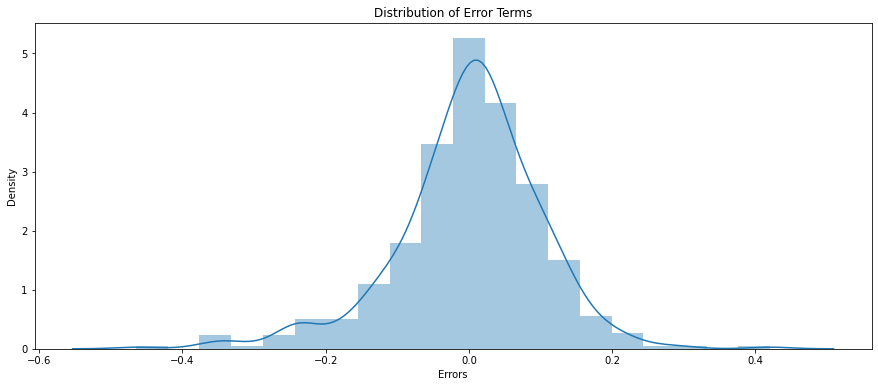

In [62]:
# Plotting the histogram of the error terms
plt.figure(figsize=(15,6))
ax = sns.distplot((y_train - y_train_cnt), bins = 20, kde = True)
ax.set_title("Distribution of Error Terms")
ax.set_xlabel("Errors")
plt.show()

### <font align = "left" color='blue'> 12. Predictions </font>

### Scaling of the Testing Dataset

In [64]:
# Applying the Training Datset Scaling to all the Numerical Variable Columns excluding the Categorical Variable Columns and Dummy Variable Columns

bikes_df_test[num_cols] = scaler.transform(bikes_df_test[num_cols])

bikes_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,LightSnowRain,MistCloudy,spring,summer,winter
588,1,0,0,0.799593,0.742307,0.325064,0.283446,0.738018,0,0,0,0,0
617,1,0,1,0.653182,0.638708,0.284351,0.669038,0.856453,0,0,0,0,0
709,1,0,1,0.366591,0.340358,0.426209,0.774705,0.612097,0,1,0,0,1
160,0,0,1,0.867088,0.819376,0.438931,0.334524,0.501630,0,0,0,1,0
454,1,0,0,0.454854,0.449759,0.642493,0.646118,0.700712,0,1,0,1,0


In [65]:
# Splitting the Testing Dataset into Features and Target

y_test = bikes_df_test.pop('cnt')
X_test = bikes_df_test

X_test.shape, y_test.shape

((213, 12), (213,))

In [66]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_lm_VIF.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making predictions

y_pred = lm.predict(X_test_new)

### <font align = "left" color='blue'> 13. Model Evaluation </font>

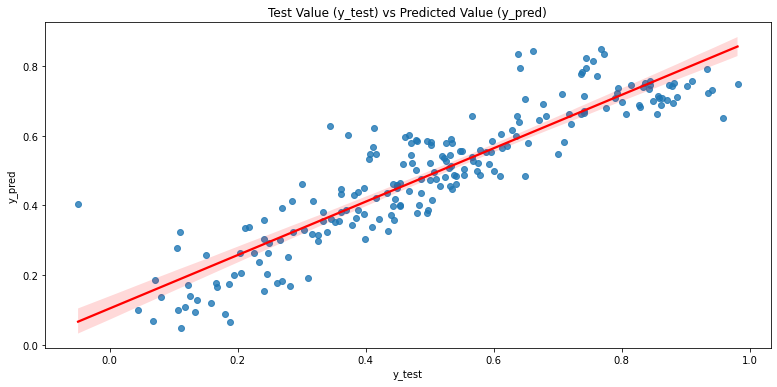

In [70]:
# Evaluting the spread of the predicted value with test value
plt.figure(figsize=(13,6))
ax = sns.regplot(x=y_test, y=y_pred,line_kws={'color':'red'},)
ax.set_title("Test Value (y_test) vs Predicted Value (y_pred)")
ax.set_xlabel("y_test")
ax.set_ylabel("y_pred")
plt.show()

In [74]:
# Evaluating the R-Squared Scores
r2_train = round(lm.rsquared, 4)
r2_test = r2_score(y_test, y_pred)

print(f"Train R-Squared_Score {r2_train:.4f}")
print(f"Test R-Squared_Score {r2_test:.4f}")

Train R-Squared_Score 0.8136
Test R-Squared_Score 0.8083


In [81]:
# Evaluating the Adjusted R-Squared Scores
adj_r2_train = round(lm.rsquared_adj, 4)

print(f"Train Adj-R-Squared_Score {adj_r2_train:.4f}")

Train Adj-R-Squared_Score 0.8109


In [79]:
# Evaluating the RSME Score (Root Mean Square Error)
rsme_test = np.sqrt(round(mean_squared_error(y_test, y_pred),4))

print(f"Test RSME_Score {rsme_test:.4f}")

Test RSME_Score 0.0995


In [83]:
# Summarising the coefficients and constant value of the final Model
round(lm.params,4)

const            0.1724
yr               0.2401
holiday         -0.0985
temp             0.4623
LightSnowRain   -0.2857
MistCloudy      -0.0754
spring          -0.1258
winter           0.0587
dtype: float64

In [88]:
# Summarising the line equation / Bike Demand after Evaluating the Model.
Model_Eqn = ""
for i, coef in enumerate (lm.params):
    Model_Eqn = Model_Eqn + " + " + str(lm.params.index[i]) + " * " + str(round(coef,4))
Model_Eqn = Model_Eqn[3:]

print(f"Final Model Equation for Bikes Demand : \n\n {Model_Eqn}")

Final Model Equation for Bikes Demand : 

 const * 0.1724 + yr * 0.2401 + holiday * -0.0985 + temp * 0.4623 + LightSnowRain * -0.2857 + MistCloudy * -0.0754 + spring * -0.1258 + winter * 0.0587


### <font align = "left" color='blue'> 14. Final Observations and Conclusion </font>

<div class = "alert alert-block alert-success">
    <b>Conclusion - Below is the Overall Summary / Conclusion w.r.t the Final Equation of the Target Variable: </b>
    <ol>
        <li> +0.2401 yr  = There has been a 24.01 % increase in bike use per year. </li>
        <li> -0.0985 holiday = Holiday affects the bike use by 9.85 %. </li>
        <li> -0.2857 lightSnowRain = When the weather is Light Snow or Rain, bike use is decreased by 28.57 %. </li>
        <li> -0.0754 MistCloudy = When the weather is Misty / Cloudy, bike share use decreases by 7.54 %.
        <li> -0.1258 Spring = During Spring season, bike use decreases by 12.58 %. </li>
        <li> +0.0587 Winter = Winter sees an increase in bike sharing by 5.87 %. </li>
    </ol>
<br>
<b>R square of the Final Model built is 0.8083, the adjusted R square is 0.8109 and RSME is 0.0995.</b>
<br>
<br>
<b>We can conclue that temp (positive relation by slope of 0.4623), year (positive relation by slope of 0.2401) and LightSnowRain (weather being Light snow or rainy with negative slope of 0.2857) are the top 3 contributors which strongly influences the Demand of the shared bikes.</b>

</div>